<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Visualisation_Hands_On_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # get seaborn libraries
import matplotlib.pyplot as plt
#import matplotlib as plt
#from matplotlib import *
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from subprocess import check_output
print(check_output(["ls","/content/drive/My Drive/data/fatal-police-shootings-in-the-us"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentagePeopleBelowPovertyLevel.csv
PercentOver25CompletedHighSchool.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
median_house_hold_income = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="unicode_escape")
median_house_hold_income = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="windows-1252")
#median_house_hold_income_clean = pd.read_csv("../input/median-householdincome2015-clean/MedianHouseholdIncome2015_clean.csv",encoding="windows-1252")
percentage_below_poverty_line = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percentage_over_25_compltd_high_school = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
police_killing = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",encoding="windows-1252")
race_by_city = pd.read_csv("/content/drive/My Drive/data/fatal-police-shootings-in-the-us/ShareRaceByCity.csv",encoding="windows-1252")

In [4]:
median_house_hold_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [0]:
median_house_hold_income.tail()

In [0]:
race_by_city.head()

In [0]:
race_by_city.describe()

In [0]:
percentage_below_poverty_line['Geographic Area'].unique()

In [0]:
percentage_below_poverty_line['Geographic Area'].describe()

Lets draw bar chart with available data.

Text(0.5, 1.0, 'Poverty Rate Given States')

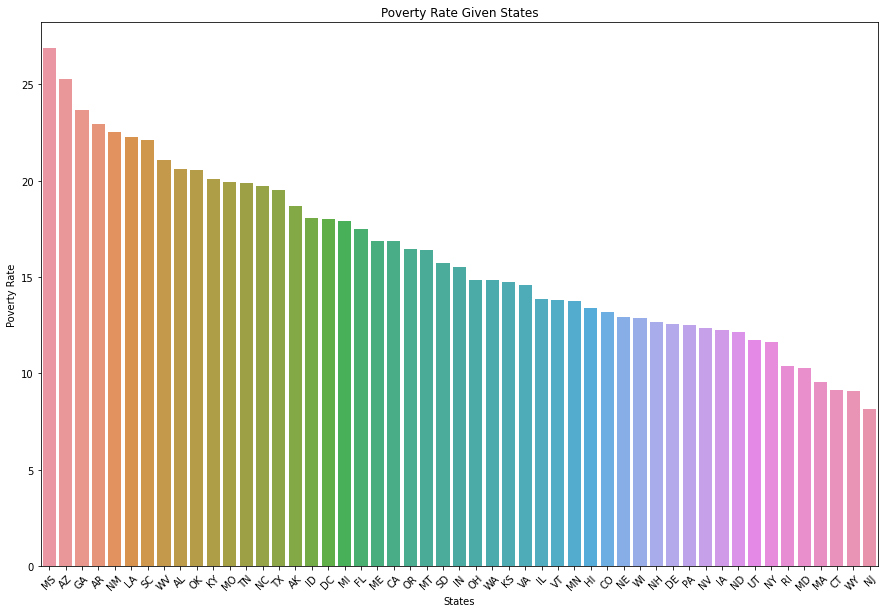

In [5]:
percentage_below_poverty_line.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_below_poverty_line.poverty_rate = percentage_below_poverty_line.poverty_rate.astype(float)
area_list = list(percentage_below_poverty_line['Geographic Area'].unique())
area_poverty_ratio = []

for i in area_list:
    x = percentage_below_poverty_line[percentage_below_poverty_line['Geographic Area'] == i ]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate) 
    
dataFM_areaList_areaPovertyratio = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (dataFM_areaList_areaPovertyratio['area_poverty_ratio'].sort_values(ascending=False)).index.values
dataFM_areaList_areaPovertyratio_sorted = dataFM_areaList_areaPovertyratio.reindex(new_index)

#visualisation

plt.figure(figsize=(15,10))
sns.barplot(x=dataFM_areaList_areaPovertyratio_sorted['area_list'], y=dataFM_areaList_areaPovertyratio_sorted['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')


Lets create BarChart for house hold income similiar to poverty rate for given states.

In [0]:
median_house_hold_income.describe()

In [0]:
median_house_hold_income["Median Income"].head()

In [0]:
median_house_hold_income.count()

In [0]:
median_house_hold_income["Median Income"].str.isnumeric()

In [0]:
iFlowStatus = median_house_hold_income[median_house_hold_income['Median Income'].str.contains('iFlow', na=False)]['Status']
print(iFlowStatus)

***median_house_hold_income_clean contains some values like (X) which I am not able to clean. In excel, because data has more than 10,000 unique value, not able to find by filter feature of data option in excel sheet. Saving it to solve it later. ***

In [0]:
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].str.replace('-', '0').str.replace('(X)', '0').str.replace('(0)', '0').str.replace('2,500-', '0')
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].dropna()
median_house_hold_income_clean['Median Income'].replace(['-'],0.0,inplace=True)
#is_numeric = median_house_hold_income["Median Income"].str.isnumeric()
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].drop(median_house_hold_income['Median Income'] =='(0)')
#median_house_hold_income["Median Income"].replace(['(X)'],0.0,inplace=True)
#median_house_hold_income["Median Income"].replace([''],0.0,inplace=True)
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].str.replace('-', '0').str.replace('(X)', '0').str.replace('(0)', '0').str.replace('2,500-', '0')
#median_house_hold_income['Median Income'] = median_house_hold_income['Median Income'].replace(to_replace='None', value=np.nan).dropna()
#median_house_hold_income = median_house_hold_income[is_numeric] 
median_house_hold_income_clean['Median Income'] = median_house_hold_income_clean['Median Income'].astype(float)
area_list = list(median_house_hold_income_clean['Geographic Area'].unique())
area_median_ratio = []

for i in area_list:
    x = median_house_hold_income_clean[median_house_hold_income_clean['Geographic Area'] == i ]
    area_median_income = sum(x['Median Income'])/len(x)
    area_median_ratio.append(area_median_income) 
    
dataFM_areaList_areaMedianratio = pd.DataFrame({'area_list': area_list,'area_median_ratio':area_median_ratio})
new_index = (dataFM_areaList_areaMedianratio['area_median_ratio'].sort_values(ascending=False)).index.values
dataFM_areaList_areaMedianratio_sorted = dataFM_areaList_areaMedianratio.reindex(new_index)

#visualisation

plt.figure(figsize=(15,10))
sns.barplot(x=dataFM_areaList_areaMedianratio_sorted['area_list'], y=dataFM_areaList_areaMedianratio_sorted['area_median_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Median Income Rate')
plt.title('Income Rate Given States')

Move for next plot figure

In [6]:
police_killing.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
separate_name = police_killing.name[police_killing.name != 'TK TK'].str.split()
separate_name.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [0]:
separate_name_TK = police_killing.name[police_killing.name == 'TK TK'].str.split()
separate_name_TK.head()

928     [TK, TK]
1397    [TK, TK]
1419    [TK, TK]
1500    [TK, TK]
1646    [TK, TK]
Name: name, dtype: object

In [0]:
first_name,last_name = zip(*separate_name)
first_name
#last_name

In [0]:
last_name

In [0]:
name_list = first_name + last_name
name_list

In [0]:
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
most_common_names

[('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('J.', 32),
 ('Anthony', 31),
 ('Jose', 28),
 ('Joshua', 28)]

In [0]:
x,y = zip(*most_common_names)
x,y=list(x),list(y)
x

['Michael',
 'David',
 'James',
 'Robert',
 'Joseph',
 'William',
 'Daniel',
 'John',
 'Christopher',
 'Lee',
 'Richard',
 'J.',
 'Anthony',
 'Jose',
 'Joshua']

In [0]:
y

[91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28]

Text(0.5, 1.0, 'Most common 15 Names or SurNames of killed people')

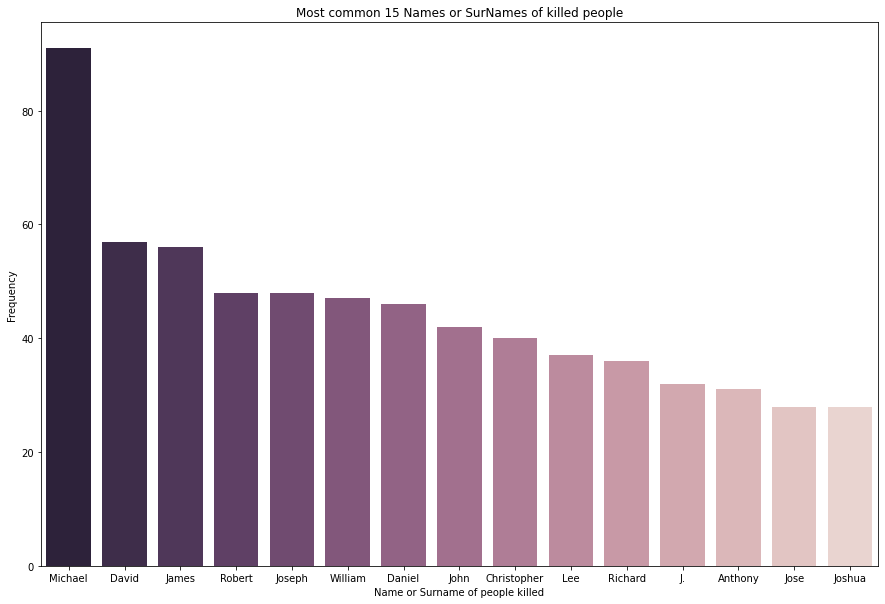

In [0]:
#now plot figure based on common names and count available to us
plt.figure(figsize=(15,10))
ax = sns.barplot(x=x, y=y, palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xlabel('Name or Surname of people killed')
plt.ylabel('Frequency')
plt.title('Most common 15 Names or SurNames of killed people')

Now lets move to another data for plotting another visualisation using seaboarn.

In [9]:
percentage_over_25_compltd_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [0]:
#High school graduation rate state wise
percentage_over_25_compltd_high_school.percent_completed_hs.replace(['-'],0.0,inplace=True)#
#percentage_over_25_compltd_high_school.percent_completed_hs.describe()
percentage_over_25_compltd_high_school.percent_completed_hs = percentage_over_25_compltd_high_school.percent_completed_hs.astype(float)
#percentage_over_25_compltd_high_school.percent_completed_hs.describe()
area_list = list(percentage_over_25_compltd_high_school['Geographic Area'].unique())
area_high_school = []
for al in area_list:
  cities_under_single_GA = percentage_over_25_compltd_high_school[percentage_over_25_compltd_high_school['Geographic Area'] == al]
  area_high_school_rate = sum(cities_under_single_GA.percent_completed_hs) / len(cities_under_single_GA)
  area_high_school.append(area_high_school_rate)  
# Sorting data before visualising it 
data = pd.DataFrame({'area_list' : area_list, 'area_highschool_ratio':area_high_school }) # create a dictionary for area list and high school rate
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
#done with preprocesing, ready for next step

Text(0.5, 1.0, 'Percentage of high school completed by over 25 by state wise')

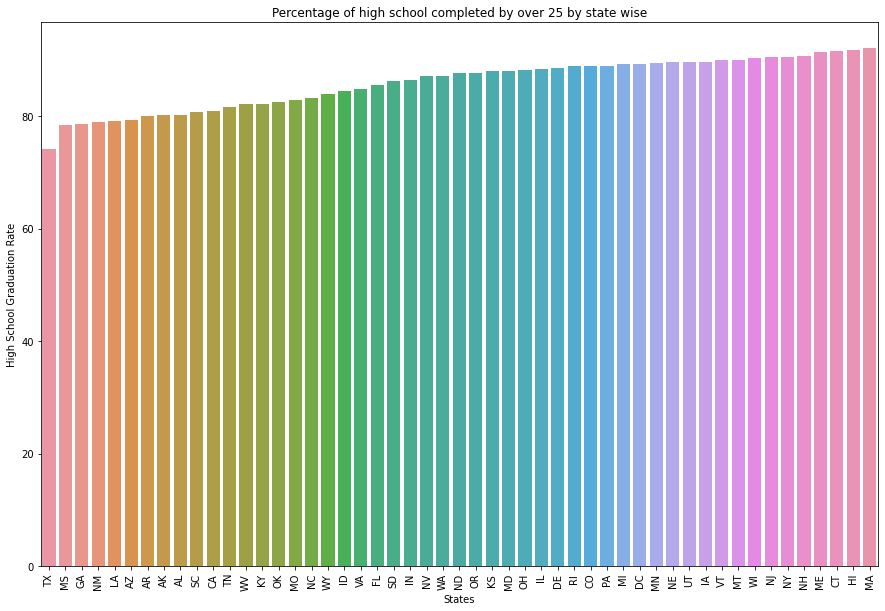

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2.area_list, y= sorted_data2.area_highschool_ratio)
plt.xticks(rotation = 90)
plt.xlabel('States')
plt.ylabel('High School Graduation Rate')
plt.title("Percentage of high school completed by over 25 by state wise")

Next visualisation is for race shared by each state.

In [22]:
race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [23]:
race_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [0]:
# Percentage of state's population categorised by race
race_by_city.replace(['-'],0.0,inplace=True)
race_by_city.replace(['(X)'],0.0,inplace=True)
race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(race_by_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for al in area_list:
  x = race_by_city[race_by_city['Geographic area'] == al]
  share_white.append(sum(x.share_white)/len(x))
  share_black.append(sum(x.share_black)/len(x))
  share_native_american.append(sum(x.share_native_american)/len(x))
  share_asian.append(sum(x.share_asian)/len(x))
  share_hispanic.append(sum(x.share_hispanic)/len(x))
#Pre-processing for visualisation ends here  

[Text(0, 0.5, 'State'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, 'Sates population share by Races')]

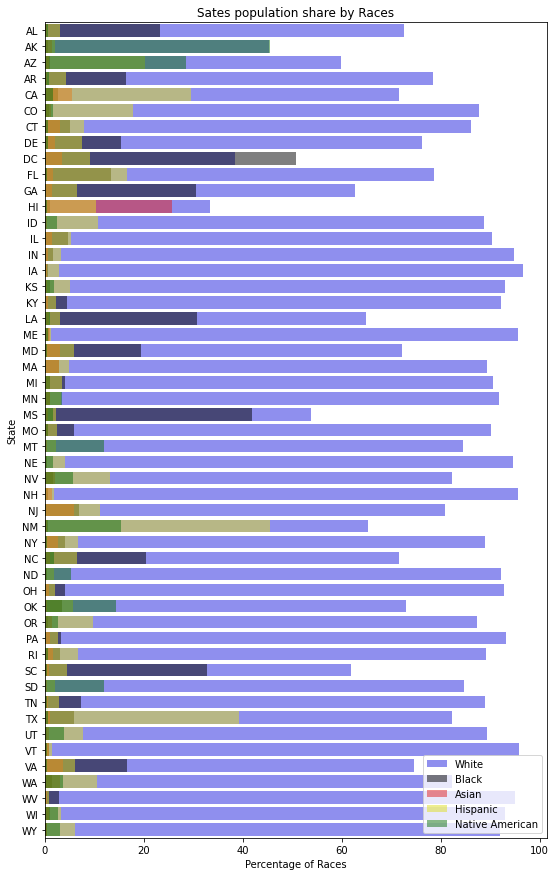

In [30]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white, y=area_list,color = 'blue', alpha = 0.5, label = 'White')
sns.barplot(x=share_black, y=area_list,color = 'black', alpha = 0.5, label = 'Black')
sns.barplot(x=share_asian, y=area_list,color = 'red', alpha = 0.5, label = 'Asian')
sns.barplot(x=share_hispanic, y=area_list,color = 'yellow', alpha = 0.5, label = 'Hispanic')
sns.barplot(x=share_native_american, y=area_list,color = 'green', alpha = 0.5, label = 'Native American')
ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Races', ylabel = 'State', title = 'Sates population share by Races')